In [9]:
# First we need to import all of the packages we will be using!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [10]:
# First model: no synthesis and degradation
# This is the definition of our system of ODEs for the model
def first_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # The above just makes it easier to relate our ODEs to the ones in the Homework text
    S_prime = -k_plus*S*K + k_minus*KS + k_cat*PSstar
    KS_prime = k_plus*S*K - k_minus*KS - k_cat*KS
    Sstar_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*KS
    PSstar_prime = k_plus*Sstar*P - k_minus*PSstar - k_cat*PSstar
    K_prime = -k_plus*S*K + k_minus*KS + k_cat*KS
    P_prime = -k_plus*Sstar*P + k_minus*PSstar + k_cat*PSstar
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

In [11]:
# PARAMETERS
# This is where we will define the parameters that we won't change for our model
k_cat = 9.9
k_minus = 0.1
k_plus = 1

In [12]:
# STEADY-STATE responses of the first model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001

# Here, we define our list of K values:
K_values = np.linspace(0.0001, 0.005)

#These will be the lists that hold the results
Sstar_results = []
r_values = []

for K_0 in K_values:
    # First, we create our initial conditions
    # We do this inside the for loop because K_0 is changing
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    # To intgrate ODEs, we need a "t" vector for time
    # Note that the units on "t" are in seconds
    # We choose a very long maximum time (20,000,000 seconds!) to insure we reach steady-state
    t = np.linspace(0,20000000,2000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(first_model,states_0,t)
    # Next, we caluclate the effective "r" value and put it in the vector for r
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    # Now, calculate our output, which remember from lecture is S*/S_t
    # (the concentration of modified substrate divided by the total substrate concentration)
    # Note that, since total substrate is conserved, S_T is just equal to S_0
    # Note that we are taking the last time point. Since there are 2,000 time points
    # The index of the last time point is 1,999
    norm_S = solution[1999,2]/S_0
    # Append this result to the vector of our results
    Sstar_results.append(norm_S)

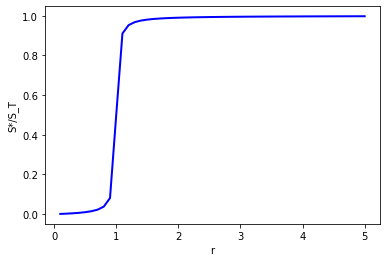

In [13]:
# PLOT your steady-state results
# Run this once for unsaturated, then change the block above and make a graph for saturated
# You can save this as a JPG or PNG and insert it into your HW answer (you can google how to do that!)
# Or you can just take a screenshot. Be warned, however, the figure needs to be big enough for us to see!
plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.show()

In [14]:
# DYNAMICS
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# First, define our initial conditions
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001
K_0 = 0.002

states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
t = np.linspace(0,200000,200000)
solution = odeint(first_model,states_0,t)

# HINT: The above code was provided for the unsaturated case
# As it says in the HW, your code needs to cover the ENTIRE dynamics until the system reaches steady state
# So, if you run it, and the curve does not reach a steady-state (i.e. flatten out)
# you will need to modify the "t=np.linspace()" line above
# Remember, np.linspace(a,b,n) has three arguments; a is the starting point, b is the end point
# and n is the number of points. To make your time course longer or shorter, all you need to change is 'b'

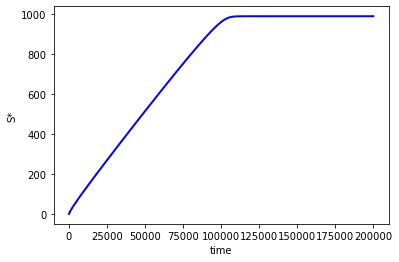

In [15]:
# PLOT your dynamics
# as with the other Plot block above, you need to run this twice, once for unsaturated and once for saturated
plt.plot(t,solution[:,2],'b-',linewidth=2)
plt.xlabel('time')
plt.ylabel('S*')
plt.show()

In [24]:
# Second model: includes synthesis and degradation
# This is the definition of our system of ODEs for the model
def second_model(states,t):
    # Our "states" list has the state variables in the following order:
    # S, KS, Sstar, PSstar, K, P
    S = states[0]
    KS = states[1]
    Sstar = states[2]
    PSstar = states[3]
    K = states[4]
    P = states[5]
    # PUT YOUR ODES below!!!
    # Hint: copy the ODEs from first_model and modify them to include synthesis and degradation
    
    S_prime = - ( k_plus * S * K ) + ( k_minus * KS ) + (k_cat * PSstar) + Q - (delta * S)
    KS_prime = (k_plus * S * K) - (KS * k_minus) - (KS * k_cat) - (delta * KS)
    Sstar_prime = (k_cat * KS) - (k_plus* P * Sstar) + (PSstar * k_minus) - (delta * Sstar)
    PSstar_prime = - (PSstar * k_minus) + (k_plus * P * Sstar) - (k_cat * PSstar) - (PSstar * delta)
    K_prime = -(k_plus * S * K) + (k_minus * KS) + (KS * k_cat) + (delta * KS) 
    P_prime = -(k_plus * P * Sstar) + (k_minus * PSstar) + (k_cat * PSstar) + (delta * PSstar)
    
    # your ODEs go above!
    states_prime = [S_prime,KS_prime,Sstar_prime,PSstar_prime,K_prime,P_prime]
    return states_prime

In [25]:
# PARAMETERS
# This is where we  define the parameters that we won't change for our second model
k_cat = 9.9
k_minus = 0.1
k_plus = 1
delta = 2e-5 # This is the value of delta we will use

In [28]:
# STEADY-STATE responses of the second model
# (hint: you will need to run this TWICE, once for unsaturated, once for saturated)

# First, define our initial conditions
# These are going to be the same for value of 'K_0'
S_0 = 1000 # This is the variable you change to change saturation!
KS_0 = 0.0
Sstar_0 = 0.0
PSstar_0 = 0.0
P_0 = 0.001
K_0 =0.001

Q= delta*S_0 # This line handily calculates the value of 'Q' that we need


# This is the same as we had above for our first model
K_values = np.linspace(0.0001, 0.005)
Sstar_results = []
r_values = []
for K_0 in K_values:
    states_0 = [S_0,KS_0,Sstar_0,PSstar_0,K_0,P_0]
    t = np.linspace(0,2000000,2000)
    solution = odeint(second_model,states_0,t)
    r = k_cat*K_0 / (k_cat*P_0)
    r_values.append(r)
    Sstar_results.append(solution[1999,2]/S_0)

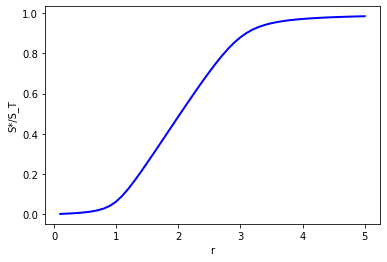

In [29]:
# PLOT your steady-state results
# Run this once for unsaturated, then change the block above and make a graph for saturated
plt.plot(r_values,Sstar_results,'b-',linewidth=2)
plt.xlabel('r')
plt.ylabel('S*/S_T')
plt.show()